In [ ]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

In [ ]:
import numpy as np # linear algebra
import pandas as pd 

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving primary_transaction(1).csv to primary_transaction(1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['primary_transaction(1).csv']))
print(df)


    id  amount  available_balance  ...    status      type primary_account_id
0   15     133             1000.0  ...  Finished   Account                 11
1   17      10              990.0  ...  Finished   Account                 11
2   19     170             6545.0  ...  Finished   Account                 11
3   21      10             6535.0  ...  Finished   Account                 11
4   23     100             6435.0  ...  Finished   Account                 11
5   28      55             6446.0  ...  Finished  Transfer                 11
6   33      10             6456.0  ...  Finished   Account                 11
7   35      10             6466.0  ...  Finished   Account                 11
8   37      67             6399.0  ...  Finished   Account                 11
9   39       8             6391.0  ...  Finished   Account                 11
10  41      66             6547.0  ...  Finished  Transfer                 11
11  43     104             1000.0  ...  Finished   Account      

In [ ]:
df.head()

,id,amount,available_balance,date,description,status,type,primary_account_id
0,15,133,1000.0,2021-05-28 12:13:28,Deposit to Primary Account,Finished,Account,11
1,17,10,990.0,2021-05-28 12:13:52,Withdraw from Primary Account,Finished,Account,11
2,19,170,6545.0,2021-05-28 12:15:44,Deposit to Primary Account,Finished,Account,11
3,21,10,6535.0,2021-05-28 12:15:59,Withdraw from Primary Account,Finished,Account,11
4,23,100,6435.0,2021-05-28 12:16:35,Between account transfer from Primary to Savings,Finished,Account,11


In [ ]:
df.shape

(19, 8)

In [ ]:


print(df.columns)



Index(['id', 'amount', 'available_balance', 'date', 'description', 'status',
       'type', 'primary_account_id'],
      dtype='object')


In [ ]:
df = df.sample(frac=0.9, random_state = 1) # taking only one percent of data 
print(df.shape)
print(df.describe())

(17, 8)
              id      amount  available_balance  primary_account_id
count  17.000000   17.000000          17.000000           17.000000
mean   38.000000   45.823529        3719.764706           10.647059
std    14.941553   52.187445        3034.743204           11.789514
min    15.000000    5.000000          10.000000            1.000000
25%    23.000000   10.000000         945.000000            2.000000
50%    39.000000   10.000000        6391.000000           11.000000
75%    48.000000   67.000000        6466.000000           11.000000
max    61.000000  170.000000        6547.000000           53.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

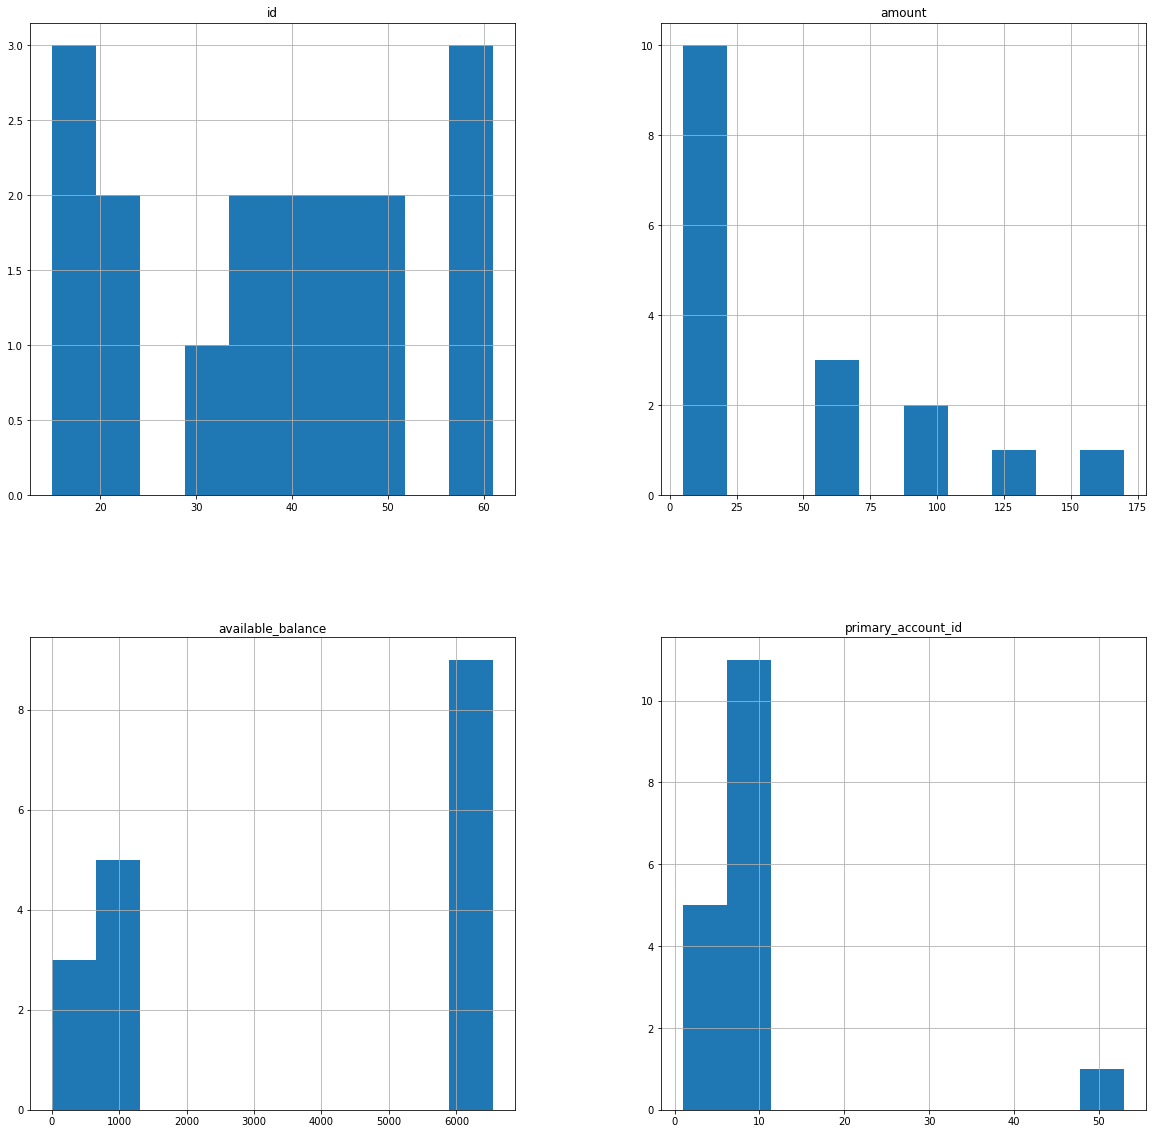

In [ ]:
df.hist(figsize = (20, 20))
plt.show()

In [ ]:
# Determine number of fraud cases in dataset

Fraud = df[df['amount'] == 5]
Valid = df[df['amount'] >10]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['amount'] == 5])))
print('Valid Transactions: {}'.format(len(df[df['amount'] > 10])))

0.2857142857142857
Fraud Cases: 2
Valid Transactions: 7


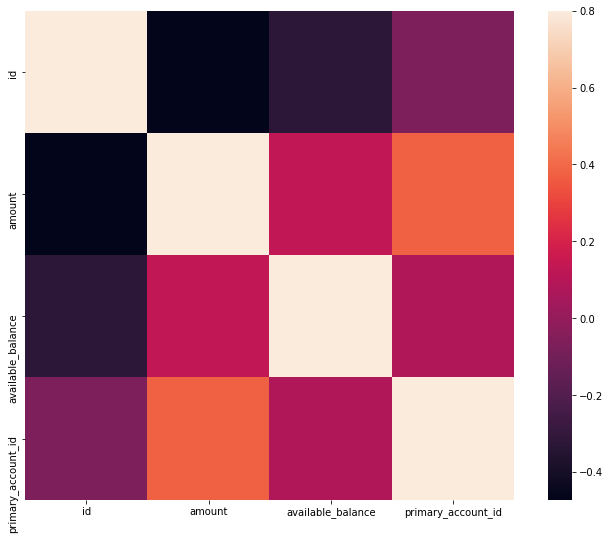

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:


# Get all the columns from the dataFrame
columns = df.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c != 'amount' and c != 'date' and c !='description' and c !='status' and c !='type']

# Store the variable we'll be predicting on
target = "amount"

X = df[columns]
Y = df[target]
print(X)
print(Y)
# Print shapes
print(X.shape)
print(Y.shape)

import sklearn
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

classifier = {
    'isolation_forest':IsolationForest(max_samples=len(X), contamination=outlier_fraction,
                                      random_state = state),
                                      
    'local_outlierfactor':LocalOutlierFactor(
    n_neighbors=20 , contamination= outlier_fraction, novelty=True
    )
}




    id  available_balance  primary_account_id
3   21             6535.0                  11
15  49             1000.0                  53
6   33             6456.0                  11
10  41             6547.0                  11
2   19             6545.0                  11
14  48               20.0                   1
4   23             6435.0                  11
16  57              935.0                   2
7   35             6466.0                  11
1   17              990.0                  11
13  47               25.0                   1
0   15             1000.0                  11
18  61               10.0                   1
17  59             6537.0                  11
9   39             6391.0                  11
8   37             6399.0                  11
12  45              945.0                   2
3      10
15    100
6      10
10     66
2     170
14      5
4     100
16     10
7      10
1      10
13      5
0     133
18     10
17     10
9       8
8      67
12     55
Na

In [ ]:
# the model dont know yet that how many outliers are there in our X data 
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

for i ,(clf_name, clf) in enumerate(classifier.items()):
    if clf_name == 'localoutlierfactor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1    
    
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

isolation_forest: 17
0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       2.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       7.0
          55       0.00      0.00      0.00       1.0
          66       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       2.0
         133       0.00      0.00      0.00       1.0
         170       0.00      0.00      0.00       1.0

    accuracy                           0.00      17.0
   macro avg       0.00      0.00      0.00      17.0
weighted avg       0.00      0.00      0.00      17.0

local_outlierfactor: 17
0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           5       0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_lof.py:259: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined 

<Figure size 648x504 with 0 Axes>

In [ ]:


df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 3 to 12
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  17 non-null     int64  
 1   amount              17 non-null     int64  
 2   available_balance   17 non-null     float64
 3   date                17 non-null     object 
 4   description         17 non-null     object 
 5   status              17 non-null     object 
 6   type                17 non-null     object 
 7   primary_account_id  17 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.2+ KB


In [ ]:


df.isnull().any()



id                    False
amount                False
available_balance     False
date                  False
description           False
status                False
type                  False
primary_account_id    False
dtype: bool

In [ ]:


import matplotlib.pyplot as plt 
import seaborn as sns

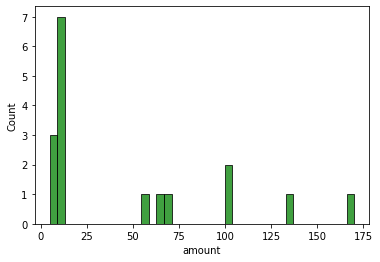

In [ ]:
sns.histplot(df['amount'],bins =40,color="green")
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

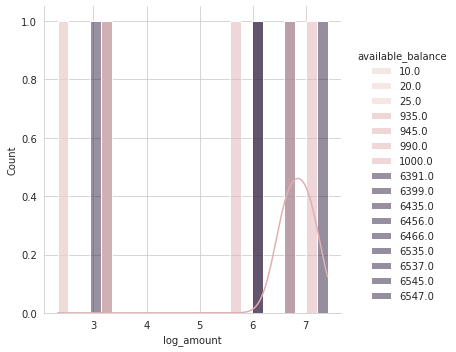

In [ ]:


sns.set_style("whitegrid")
df["log_amount"] = np.log2(df["amount"]+0.01)
sns.displot(x = "log_amount",bins = 25, kde = True, hue = "available_balance", data=df)



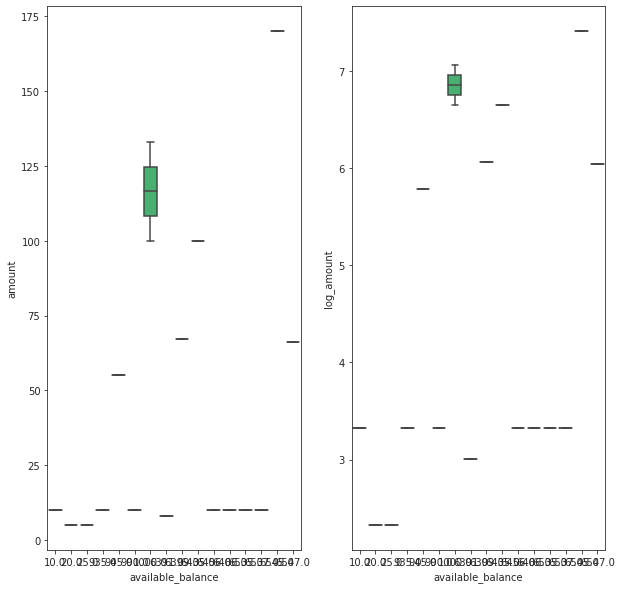

In [ ]:
sns.set_style("ticks")
fig,ax  = plt.subplots(ncols = 2,nrows =1,figsize = (10,10))
ax.flatten()
sns.boxplot(x = "available_balance", y = "amount", data=df, ax = ax[0])
sns.boxplot(x = "available_balance",y = "log_amount", data =df, ax = ax[1])

sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
sns.countplot(x = "amount", data=df)

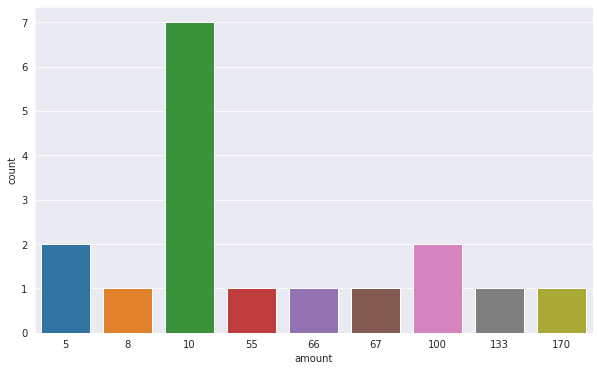

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
sns.countplot(x = "amount", data=df)

In [ ]:
# Determine number of fraud cases in dataset

fraud = df[df['amount'] == 5]
not_fraud = df[df['amount'] >10]

In [ ]:
print(fraud.shape,not_fraud.shape)

(2, 9) (7, 9)


In [ ]:
x = df.drop(["amount" , "date", "description" , "status", "type" ], axis = 1)
y = df["amount"]
print(x)
print(y)
 
print(x.shape,y.shape)

    id  available_balance  primary_account_id  log_amount
3   21             6535.0                  11    3.323370
15  49             1000.0                  53    6.644000
6   33             6456.0                  11    3.323370
10  41             6547.0                  11    6.044613
2   19             6545.0                  11    7.409476
14  48               20.0                   1    2.324811
4   23             6435.0                  11    6.644000
16  57              935.0                   2    3.323370
7   35             6466.0                  11    3.323370
1   17              990.0                  11    3.323370
13  47               25.0                   1    2.324811
0   15             1000.0                  11    7.055391
18  61               10.0                   1    3.323370
17  59             6537.0                  11    3.323370
9   39             6391.0                  11    3.001802
8   37             6399.0                  11    6.066305
12  45        

In [ ]:
x.head()

,id,amount,available_balance,date,description,status,primary_account_id,log_amount
3,21,10,6535.0,2021-05-28 12:15:59,Withdraw from Primary Account,Finished,11,3.323370
15,49,100,1000.0,2021-06-02 22:55:11,Deposit to Primary Account,Finished,53,6.644000
6,33,10,6456.0,2021-05-31 18:25:46,Deposit to Primary Account,Finished,11,3.323370
10,41,66,6547.0,2021-06-02 11:53:59,Transfer to recipient ahmed,Finished,11,6.044613
2,19,170,6545.0,2021-05-28 12:15:44,Deposit to Primary Account,Finished,11,7.409476
